In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Bidirectional
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
CFG = [
    '/kaggle/input/software-effort-estimation-datasets/albrecht.csv',
    '/kaggle/input/software-effort-estimation-datasets/china.csv',
    '/kaggle/input/software-effort-estimation-datasets/desharnais.csv',
    '/kaggle/input/software-effort-estimation-datasets/finnish.csv',
    '/kaggle/input/software-effort-estimation-datasets/isbsg10.csv',
    '/kaggle/input/software-effort-estimation-datasets/kemerer.csv',
    '/kaggle/input/software-effort-estimation-datasets/kitchenham.csv',
    '/kaggle/input/software-effort-estimation-datasets/maxwell.csv',
    '/kaggle/input/software-effort-estimation-datasets/miyazaki94.csv'
]

# Data Preprocessing

In [3]:
def data_albrecht():
    df = pd.read_csv(CFG[0])
    df_for_training = df.astype(float)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = MinMaxScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    return df


def data_china():
    
    df = pd.read_csv(CFG[1])
    df = df.drop(columns=['id','ID'])
    df_for_training = df.astype(float)
#     print(df.columns)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    
    trainX = []
    trainY = []
    n_future = 2   # Number of days we want to look into the future based on the past days.
    n_past = 2 # Number of past days we want to use to predict the future.

    for i in range(n_past, len(df_for_training_scaled) - n_future +1):
        trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
        trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, df_for_training.shape[1] - 1])

    trainX, trainY = np.array(trainX), np.array(trainY)

    return trainX, trainY


def data_desharnais():
    df = pd.read_csv(CFG[2])
    df = df.drop(columns=['Project','YearEnd', 'Language'])
    df_for_training = df.astype(float)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    return df


def data_finnish():
    df = pd.read_csv(CFG[3])
    df_for_training = df.astype(float)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = MinMaxScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    return df


def data_isbsg10():

    df = pd.read_csv(CFG[4])
    df = df.drop(columns = ['id', 'ID', 'Data_Quality', 'Year','AG', 'N_effort_level1',
           'N_PDR1', 'SDR', 'PET', 'PIT', 'I_Date', 'PAS',
           'Recording_Method', 'Resource_Level', 'MTS', 'ATS', 'R_PWE_NPA',
           'P_UWE', 'CASE_Tool', 'UM', 'HMA', 'Hardware1',
           'IDE', 'DT1', 'DBS1', 'CS1', 'WS1', 'MS1', 'OP1', 'RTA',
           'SP_CMMI', 'SP_ISO', 'SP_TICKIT', 'MIN_Defects', 'MAJ_Defects',
           'X_Defects', 'TOT_Defects', 'UB_BU', 'UB_L', 'UB_DU', 'UB_CU',
           'IMarket', 'T_Platform', 'D_Embedded', 'SE', 'SEA', 'SEM', 'E_Estimate',
           'E_Estimate_Method', 'DDE', 'DDEM', 'C_Estimate', 'CEC', 'CEM',
           'E_Tool', 'E_Comments', 'EC_Date', 'SR?', 'SR', 'R_FPC', 'R_FPA',
           'P_Defects', 'D_Defects', 'MIN_B_Defects', 'MAJ_B_Defects',
           'X_B_Defects', 'TOT_B_Defects', 'MIN_T_Defects', 'MAJ_T_Defects',
           'X_T_Defects', 'TOT_T_Defects','S_Defects', 'MIN_I_Defects', 'MAJ_I_Defects',
           'X_I_Defects', 'TOT_I_Defects'], axis = 1)
    # Replace "?" with numpy.nan
    df.replace('?', np.nan, inplace=True)
#     print(df.columns)
    
    # imputation transformer
    trf1 = ColumnTransformer([
        ('impute',SimpleImputer(strategy='constant', fill_value='Missing'),[14,15,16,17,18])
    ],remainder='passthrough')
    
    trf2 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop= 'first'),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15])
    ],remainder='passthrough')
    
    pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ])
    
    pipe.fit_transform(df)
    
    return pipe.fit_transform(df)


def data_kemerer():
    df = pd.read_csv(CFG[5])
    df_for_training = df.astype(float)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    return df
    

    
def data_kitchenham():
    df = pd.read_csv(CFG[6])
    df_for_training = df.astype(float)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = MinMaxScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    return df


def data_maxwell():
    df = pd.read_csv(CFG[7])
    df_for_training = df.astype(float)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    return df


def data_miyazaki():
    df = pd.read_csv(CFG[8])
    df_for_training = df.astype(float)
    #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
    # normalize the dataset
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)
    return df


# LSTM Model

In [4]:
# trainX, trainY = data_china()


# print('trainX shape == {}.'.format(trainX.shape))
# print('trainY shape == {}.'.format(trainY.shape))

# # define the Autoencoder model

# model = Sequential()
# model.add(BatchNormalization(input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(Dropout(0.1))
# model.add(Dense(trainY.shape[1]))

# model.compile(optimizer='sgd', loss='mse')
# model.summary()


# # fit the model
# history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')


In [5]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [6]:
# trainY.shape[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 2, 18)            72        
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 2, 128)           42496     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 2, 32)             20608     
                                                                 
 dropout (Dropout)           (None, 2, 32)             0         
                                                                 
 dense (Dense)               (None, 2, 1)              33        
                                                                 
Total params: 63,209
Trainable params: 63,173
Non-traina

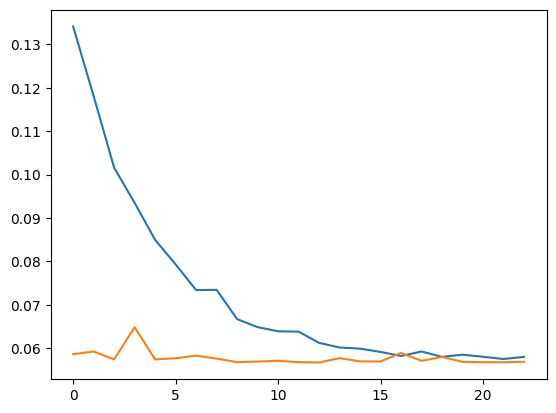

In [7]:
trainX, trainY = data_china()
# def create_and_train_autoencoder(trainX, trainY, epochs, batch_size, validation_split, 
#                                  learning_rate, dropout_rate, activation, 
#                                  optimizer, loss):
    
#     model = Sequential()
#     model.add(BatchNormalization(input_shape=(trainX.shape[1], trainX.shape[2])))
#     model.add(Bidirectional(LSTM(64, activation=activation, return_sequences=True)))
#     model.add(LSTM(32, activation=activation, return_sequences=False))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(trainY.shape[1]))

#     model.compile(optimizer=optimizer, loss=loss)
#     model.summary()


#     # fit the model
#     history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=1)

#     plt.plot(history.history['loss'], label='Training loss')
#     plt.plot(history.history['val_loss'], label='Validation loss')

#     return model, history

def create_and_train_autoencoder(trainX, trainY, epochs, batch_size, validation_split, 
                                 learning_rate, dropout_rate, lstm_units, activation, 
                                 optimizer, loss):
    
    model = Sequential()
    model.add(BatchNormalization(input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Bidirectional(LSTM(lstm_units, activation=activation, return_sequences=True)))
    model.add(LSTM(lstm_units // 2, activation=activation, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(Dense(trainY.shape[1]))



    
    model.compile(optimizer=optimizer, loss=loss)
    model.summary()

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # fit the model with early stopping
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, 
                        validation_split=validation_split, verbose=1, callbacks=[early_stopping])
   
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')

    return model, history


# Example usage:
# Adjust hyperparameters as needed
# autoencoder_model, training_history = create_and_train_autoencoder(trainX, trainY, 
#                                                                     epochs=500, batch_size=32, 
#                                                                     validation_split=0.1, 
#                                                                     learning_rate=best_hyperparameters[0], 
#                                                                     dropout_rate=best_hyperparameters[1], 
#                                                                     lstm_units=int(best_hyperparameters[2]),
#                                                                     activation='relu', 
#                                                                     optimizer='adam', 
#                                                                     loss='mse')

autoencoder_model, training_history = create_and_train_autoencoder(trainX, trainY, 
                                                                    epochs=100, batch_size=16, 
                                                                    validation_split=0.1, 
                                                                    learning_rate=0.01, 
                                                                    dropout_rate=0.1,
                                                                    lstm_units= 64,
                                                                    activation='sigmoid', 
                                                                    optimizer='adam', 
                                                                    loss= 'mae',
                                                                    
                                                                  )

Best Hyperparameters:
Learning Rate: 0.04615150977622847
Dropout Rate: 0.6589721588176572
LSTM Units: 37
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 2, 18)            72        
 hNormalization)                                                 
                                                                 
 bidirectional_1 (Bidirectio  (None, 2, 74)            16576     
 nal)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 2, 18)             6696      
                                                                 
 dropout_1 (Dropout)         (None, 2, 18)             0         
                                                                 
 dense_1 (Dense)             (None, 2, 1)              19        
               

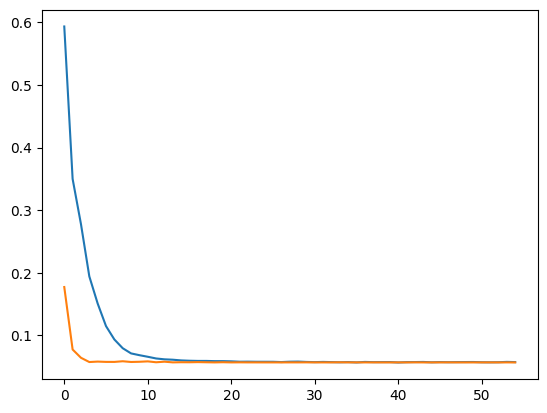

In [8]:
import numpy as np

def harmonic_search(objective_function, search_space, num_iterations):
    # Initialize parameters
    num_harmonics = 10
    pitch_adjustment_rate = 0.01

    # Initialize random solutions within the search space
    solutions = np.random.uniform(low=search_space[:, 0], high=search_space[:, 1], size=(num_harmonics, len(search_space)))

    for iteration in range(num_iterations):
        # Evaluate the performance of each solution
        scores = [objective_function(solution) for solution in solutions]

        # Select the top-performing solutions as parents
        parents = solutions[np.argsort(scores)[:2]]

        # Generate new candidate solutions by combining and modifying parents
        new_solutions = parents[0] + np.random.uniform(low=-pitch_adjustment_rate, high=pitch_adjustment_rate, size=parents.shape)

        # Clip new solutions to the search space
        new_solutions = np.clip(new_solutions, search_space[:, 0], search_space[:, 1])

        # Replace the worst solutions with the new ones
        worst_index = np.argmax(scores)
        solutions[worst_index] = new_solutions[0]  # Take the first parent as the new solution

    # Return the best solution found
    best_solution = solutions[np.argmin(scores)]
    return best_solution

# Example usage:
# Define the search space for hyperparameters
search_space = np.array([
    [0.001, 0.1],  # Learning Rate
    [0.1, 0.9],    # Dropout Rate
    [16, 64],     # Number of LSTM units
])

# Define your objective function (replace with your actual training and evaluation logic)
def objective_function(hyperparameters):
    learning_rate, dropout_rate, lstm_units = hyperparameters
    
    try:
        # Create and train LSTM model with the given hyperparameters
        # Return the performance metric to be minimized (e.g., validation loss)
        autoencoder_model, training_history = create_and_train_autoencoder(trainX, trainY, 
                                                                            epochs=100, batch_size=16, 
                                                                            validation_split=0.1, 
                                                                            learning_rate=learning_rate, 
                                                                            dropout_rate=dropout_rate, 
                                                                            lstm_units=int(lstm_units),
                                                                            activation='sigmoid', 
                                                                            optimizer='adam')
        
        # Retrieve the performance metric (e.g., validation loss) from the training history
        metric = min(training_history.history['val_loss'])  # Assuming 'val_loss' is the relevant metric

        return metric
    except Exception as e:
        # Return a large value in case of an error
        return float('inf')

# Run harmonic search
best_hyperparameters = harmonic_search(objective_function, search_space, num_iterations=50)

# Print or log the best hyperparameters
print("Best Hyperparameters:")
print("Learning Rate:", best_hyperparameters[0])
print("Dropout Rate:", best_hyperparameters[1])
print("LSTM Units:", int(best_hyperparameters[2]))

# Update your LSTM model with the best hyperparameters
autoencoder_model, training_history = create_and_train_autoencoder(trainX, trainY, 
                                                                    epochs=100, batch_size=16, 
                                                                    validation_split=0.1, 
                                                                    learning_rate=best_hyperparameters[0], 
                                                                    dropout_rate=best_hyperparameters[1], 
                                                                    lstm_units=int(best_hyperparameters[2]),
                                                                    activation='sigmoid', 
                                                                    optimizer='adam', 
                                                                    loss='mae',
                                                                    
                                                                  )

# Optionally, you can also print or log other relevant information, such as the best performance metric
best_metric = objective_function(best_hyperparameters)
print("Best Performance Metric:", best_metric)


In [9]:

#     from sklearn.preprocessing import MinMaxScaler
#     df = pd.read_csv(CFG[1])
# #     x = df.drop(columns=['id','ID'])
#     # Assuming your dataset is stored in a DataFrame named 'df'
#     # If not, replace 'df' with the actual name of your DataFrame

#     # Extract the target variable
#     target_variable = 'Effort'
#     y = df[target_variable]

#     # Extract features (excluding target variable)
#     X = df.drop(columns=['id','ID', 'Effort'])

#     # Normalize the dataset
#     scaler = MinMaxScaler()
#     X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#     # Split the dataset into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

#     # Check the shapes of the resulting sets
#     print("X_train shape:", X_train.shape)
#     print("X_test shape:", X_test.shape)
#     print("y_train shape:", y_train.shape)
#     print("y_test shape:", y_test.shape)
# df

In [10]:
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVR
# from sklearn.metrics import  mean_absolute_error



# # Create an SVM regressor
# svm_regressor = SVR(kernel='linear', C=1)

# svm_regressor.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_regressor.predict(X_test)

# # Evaluate mean squared error
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Squared Error: {mae}")


In [11]:
# trainX.shape

Epoch 1/100
12/12 [==============================] - 4s 66ms/step - loss: 0.0188 - val_loss: 0.0161
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0151 - val_loss: 0.0126
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0112
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0122 - val_loss: 0.0103
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.0079
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0068 - val_loss: 0.0061
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 11

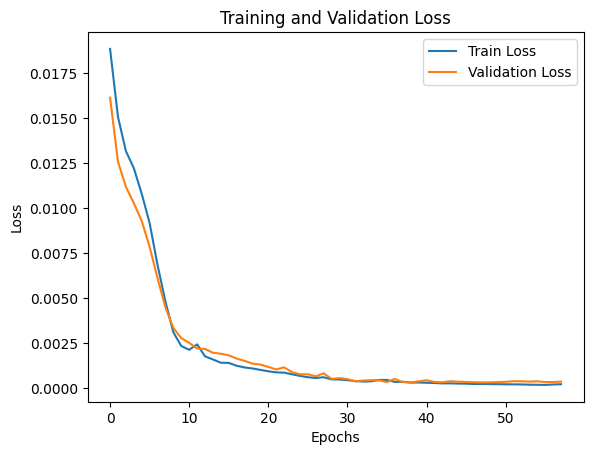

4/4 [==============================] - 1s 3ms/step
Mean Absolute Error: 471.1184133911133


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
df = pd.read_csv(CFG[1])
# Load your dataset (assuming it's in a DataFrame named 'df')
# Replace 'Effort' with the actual column name you want to predict
target_column = 'Effort'

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Data Preprocessing
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_normalized = scaler_X.fit_transform(X.values)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X for LSTM input (assuming you have a sequence length)
sequence_length = 1  # Adjust based on your dataset
X_reshaped = X_normalized.reshape((X_normalized.shape[0], sequence_length, X_normalized.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_normalized, test_size=0.2, random_state=42)

# Model Construction and Training
inp = Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2]))
e = Sequential()(inp)
g = LSTM(units=64, return_sequences=True)(e)
h = LSTM(units=32, return_sequences=True)(g)
s = Attention(use_scale=True)([h, h])
f = Activation('relu')(s)
out = Dense(1)(f)  # Assuming a regression task

model = Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='mean_squared_error')  # You can use other loss functions for regression

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and monitor the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Prediction
y_pred = model.predict(X_test)

# Rescale predictions to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Rescale true labels to the original scale
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate mean absolute error
mae = np.mean(np.abs(y_test_rescaled - y_pred_rescaled))
print(f"Mean Absolute Error: {mae}")


In [13]:
df = pd.read_csv(CFG[1])
# df = df.drop(columns=['id','ID'])
df.shape

(499, 20)

[I 2025-01-05 20:52:52,452] A new study created in memory with name: no-name-5197bba3-8bdc-4cf0-bdc1-28d929b7c427
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 594ms/step


[I 2025-01-05 20:52:58,474] Trial 0 finished with value: 8669.118389423076 and parameters: {'units1': 122, 'units2': 28, 'learning_rate': 0.07433458662131823}. Best is trial 0 with value: 8669.118389423076.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 577ms/step


[I 2025-01-05 20:53:03,951] Trial 1 finished with value: 9362.969595102164 and parameters: {'units1': 68, 'units2': 39, 'learning_rate': 0.036801570499553855}. Best is trial 0 with value: 8669.118389423076.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 583ms/step


[I 2025-01-05 20:53:10,758] Trial 2 finished with value: 5336.618577223558 and parameters: {'units1': 84, 'units2': 27, 'learning_rate': 0.007368257741300692}. Best is trial 2 with value: 5336.618577223558.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 569ms/step


[I 2025-01-05 20:53:17,241] Trial 3 finished with value: 5488.525681715745 and parameters: {'units1': 100, 'units2': 45, 'learning_rate': 0.00348257441690919}. Best is trial 2 with value: 5336.618577223558.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 596ms/step


[I 2025-01-05 20:53:22,957] Trial 4 finished with value: 9093.27139047476 and parameters: {'units1': 114, 'units2': 23, 'learning_rate': 0.0018047473229600604}. Best is trial 2 with value: 5336.618577223558.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 573ms/step


[I 2025-01-05 20:53:28,946] Trial 5 finished with value: 8595.843768780049 and parameters: {'units1': 32, 'units2': 28, 'learning_rate': 0.08252334317044936}. Best is trial 2 with value: 5336.618577223558.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 581ms/step


[I 2025-01-05 20:53:35,307] Trial 6 finished with value: 5373.367685171274 and parameters: {'units1': 35, 'units2': 64, 'learning_rate': 0.008001381586301808}. Best is trial 2 with value: 5336.618577223558.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 583ms/step


[I 2025-01-05 20:53:41,140] Trial 7 finished with value: 5912.662484975962 and parameters: {'units1': 88, 'units2': 56, 'learning_rate': 0.015643803371048193}. Best is trial 2 with value: 5336.618577223558.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 579ms/step


[I 2025-01-05 20:53:47,634] Trial 8 finished with value: 9742.867657001201 and parameters: {'units1': 125, 'units2': 42, 'learning_rate': 0.0736678792211381}. Best is trial 2 with value: 5336.618577223558.
/tmp/ipykernel_32/1519913500.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 563ms/step


[I 2025-01-05 20:53:54,104] Trial 9 finished with value: 5338.1104079026445 and parameters: {'units1': 107, 'units2': 52, 'learning_rate': 0.0055637513929468725}. Best is trial 2 with value: 5336.618577223558.


Epoch 1/200
2/2 [==============================] - 4s 666ms/step - loss: 0.0260 - val_loss: 0.0068
Epoch 2/200
2/2 [==============================] - 0s 29ms/step - loss: 0.0148 - val_loss: 0.0121
Epoch 3/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0154 - val_loss: 0.0073
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0125 - val_loss: 0.0058
Epoch 5/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0111 - val_loss: 0.0021
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0096 - val_loss: 9.7263e-04
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0067 - val_loss: 0.0049
Epoch 8/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0070 - val_loss: 5.0496e-04
Epoch 9/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 10/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0035 - val_loss: 7.4545e-04
Epoch 

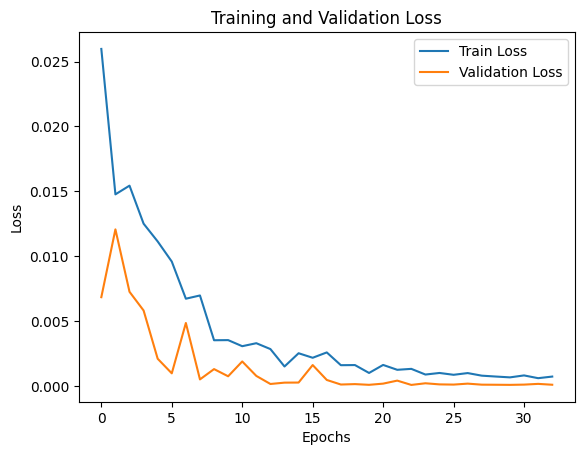

1/1 [==============================] - 1s 564ms/step
Mean Absolute Error: 5000.967801607572


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
import optuna

df = pd.read_csv(CFG[7])
# df = df.drop(columns=['id','ID'])
# Load your dataset (assuming it's in a DataFrame named 'df')
# Replace 'Effort' with the actual column name you want to predict
target_column = 'Effort'

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Data Preprocessing
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_normalized = scaler_X.fit_transform(X.values)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X for LSTM input (assuming you have a sequence length)
sequence_length = 1  # Adjust based on your dataset
X_reshaped = X_normalized.reshape((X_normalized.shape[0], sequence_length, X_normalized.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_normalized, test_size=0.2, random_state=42)

# Model Construction and Training
def build_model(units1, units2, learning_rate):
    inp = Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2]))
    e = Sequential()(inp)
    g = LSTM(units=units1, return_sequences=True)(e)
    h = LSTM(units=units2, return_sequences=True)(g)
    s = Attention(use_scale=True)([h, h])
    f = Activation('relu')(s)
    out = Dense(1)(f)  # Assuming a regression task

    model = Model(inputs=inp, outputs=out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')  # You can use other loss functions for regression
    
    return model

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Objective function for Optuna
def objective(trial):
    units1 = trial.suggest_int('units1', 32, 128)
    units2 = trial.suggest_int('units2', 16, 64)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)

    model = build_model(units1=units1, units2=units2, learning_rate=learning_rate)
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=0)
    
    return mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1)))

# Perform hyperparameter tuning with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params

# Train the final model with the best hyperparameters
best_model = build_model(**best_params)
best_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(best_model.history.history['loss'], label='Train Loss')
plt.plot(best_model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Prediction
y_pred = best_model.predict(X_test)

# Rescale predictions to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Rescale true labels to the original scale
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate mean absolute error
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error: {mae}")


Epoch 1/100
2/2 [==============================] - 4s 665ms/step - loss: 0.0315 - val_loss: 0.0023
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0278 - val_loss: 0.0014
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0248 - val_loss: 8.7695e-04
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0223 - val_loss: 7.1709e-04
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0207 - val_loss: 8.8532e-04
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0190 - val_loss: 0.0013
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0178 - val_loss: 0.0021
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0166 - val_loss: 0.0030
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0157 - val_loss: 0.0042
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0153 - val_loss: 0.0054
Epoch 

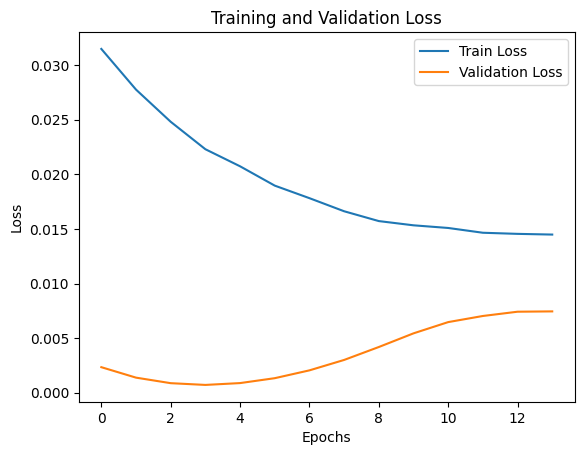

1/1 [==============================] - 1s 571ms/step
Root Mean Squared Error (RMSE): 18091.151509686842


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load your dataset (assuming it's in a DataFrame named 'df')
# Replace 'Effort' with the actual column name you want to predict
target_column = 'Effort'

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Data Preprocessing
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_normalized = scaler_X.fit_transform(X.values)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X for LSTM input (assuming you have a sequence length)
sequence_length = 1  # Adjust based on your dataset
X_reshaped = X_normalized.reshape((X_normalized.shape[0], sequence_length, X_normalized.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_normalized, test_size=0.2, random_state=42)

# Model Construction and Training
inp = Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2]))
e = Sequential()(inp)
g = LSTM(units=64, return_sequences=True)(e)
h = LSTM(units=32, return_sequences=True)(g)
s = Attention(use_scale=True)([h, h])
f = Activation('relu')(s)
out = Dense(1)(f)  # Assuming a regression task

model = Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='mean_squared_error')  # You can use other loss functions for regression

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and monitor the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Prediction
y_pred = model.predict(X_test)

# Rescale predictions to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Rescale true labels to the original scale
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"Root Mean Squared Error (RMSE): {rmse}")


[I 2025-01-05 20:54:06,792] A new study created in memory with name: no-name-3c23960f-801f-4db9-91a3-9d82b53c5e53
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 577ms/step


[I 2025-01-05 20:54:12,249] Trial 0 finished with value: 9037.605224609375 and parameters: {'units1': 91, 'units2': 37, 'learning_rate': 0.04315316598746418}. Best is trial 0 with value: 9037.605224609375.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 605ms/step


[I 2025-01-05 20:54:18,534] Trial 1 finished with value: 8938.702411358174 and parameters: {'units1': 47, 'units2': 57, 'learning_rate': 0.0021829582929710086}. Best is trial 1 with value: 8938.702411358174.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 575ms/step


[I 2025-01-05 20:54:25,059] Trial 2 finished with value: 4131.723069411058 and parameters: {'units1': 81, 'units2': 53, 'learning_rate': 0.015143435712178861}. Best is trial 2 with value: 4131.723069411058.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 602ms/step


[I 2025-01-05 20:54:31,214] Trial 3 finished with value: 5168.569091796875 and parameters: {'units1': 95, 'units2': 40, 'learning_rate': 0.008117346574912341}. Best is trial 2 with value: 4131.723069411058.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 588ms/step


[I 2025-01-05 20:54:37,805] Trial 4 finished with value: 5130.193781926082 and parameters: {'units1': 57, 'units2': 46, 'learning_rate': 0.011016386301712098}. Best is trial 2 with value: 4131.723069411058.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 571ms/step


[I 2025-01-05 20:54:43,648] Trial 5 finished with value: 6813.08491398738 and parameters: {'units1': 109, 'units2': 62, 'learning_rate': 0.03706690172132587}. Best is trial 2 with value: 4131.723069411058.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 601ms/step


[I 2025-01-05 20:54:49,456] Trial 6 finished with value: 4866.010178786058 and parameters: {'units1': 99, 'units2': 43, 'learning_rate': 0.027396753952835914}. Best is trial 2 with value: 4131.723069411058.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 587ms/step


[I 2025-01-05 20:54:56,455] Trial 7 finished with value: 5928.937055147611 and parameters: {'units1': 126, 'units2': 58, 'learning_rate': 0.03265781248534698}. Best is trial 2 with value: 4131.723069411058.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 575ms/step


[I 2025-01-05 20:55:01,790] Trial 8 finished with value: 8494.714393028846 and parameters: {'units1': 75, 'units2': 27, 'learning_rate': 0.0030013909511781758}. Best is trial 2 with value: 4131.723069411058.
/tmp/ipykernel_32/3031650394.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 575ms/step


[I 2025-01-05 20:55:08,079] Trial 9 finished with value: 4796.043100210337 and parameters: {'units1': 102, 'units2': 52, 'learning_rate': 0.0038990295347079125}. Best is trial 2 with value: 4131.723069411058.


Epoch 1/100
2/2 [==============================] - 5s 696ms/step - loss: 0.0297 - val_loss: 0.0020
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0176 - val_loss: 0.0040
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0137 - val_loss: 0.0183
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0176 - val_loss: 0.0046
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0125 - val_loss: 5.5613e-04
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0141 - val_loss: 6.6775e-04
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0105 - val_loss: 0.0057
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0096 - val_loss: 0.0021
Epoch 9/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0063 - val_loss: 5.1890e-04
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0060 - val_loss: 7.7370e-04
Ep

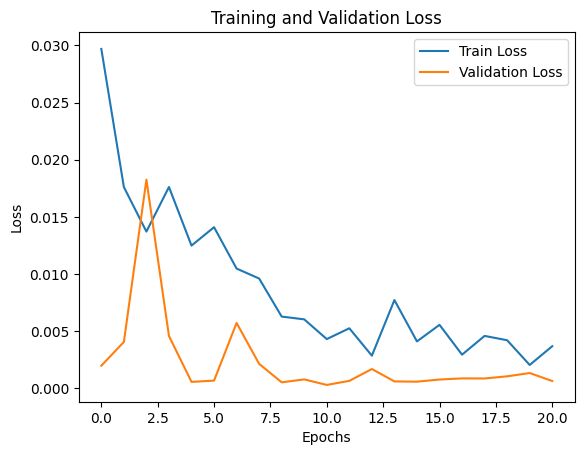

1/1 [==============================] - 1s 604ms/step
Root Mean Squared Error (RMSE): 8575.035461329559


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
import optuna

# Load your dataset (assuming it's in a DataFrame named 'df')
# Replace 'Effort' with the actual column name you want to predict
target_column = 'Effort'

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Data Preprocessing
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_normalized = scaler_X.fit_transform(X.values)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X for LSTM input (assuming you have a sequence length)
sequence_length = 1  # Adjust based on your dataset
X_reshaped = X_normalized.reshape((X_normalized.shape[0], sequence_length, X_normalized.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_normalized, test_size=0.2, random_state=42)

# Model Construction and Training
def build_model(units1, units2, learning_rate):
    inp = Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2]))
    e = Sequential()(inp)
    g = LSTM(units=units1, return_sequences=True)(e)
    h = LSTM(units=units2, return_sequences=True)(g)
    s = Attention(use_scale=True)([h, h])
    f = Activation('relu')(s)
    out = Dense(1)(f)  # Assuming a regression task

    model = Model(inputs=inp, outputs=out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')  # You can use other loss functions for regression
    
    return model

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Objective function for Optuna
def objective(trial):
    units1 = trial.suggest_int('units1', 32, 128)
    units2 = trial.suggest_int('units2', 16, 64)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)

    model = build_model(units1=units1, units2=units2, learning_rate=learning_rate)
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=0)
    
    return mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1)))

# Perform hyperparameter tuning with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params

# Train the final model with the best hyperparameters
best_model = build_model(**best_params)
best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(best_model.history.history['loss'], label='Train Loss')
plt.plot(best_model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Prediction
y_pred = best_model.predict(X_test)

# Rescale predictions to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Rescale true labels to the original scale
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"Root Mean Squared Error (RMSE): {rmse}")


[I 2025-01-05 20:55:15,081] A new study created in memory with name: no-name-6e74814b-fe3b-49ec-8ae4-e11d5994bd77
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 583ms/step


[I 2025-01-05 20:55:20,651] Trial 0 finished with value: 8701.14130108173 and parameters: {'units1': 112, 'units2': 30, 'learning_rate': 0.0011231842307858606}. Best is trial 0 with value: 8701.14130108173.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 595ms/step


[I 2025-01-05 20:55:27,222] Trial 1 finished with value: 5233.072922926683 and parameters: {'units1': 100, 'units2': 24, 'learning_rate': 0.018215658177366412}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 583ms/step


[I 2025-01-05 20:55:34,016] Trial 2 finished with value: 5522.453970102163 and parameters: {'units1': 54, 'units2': 59, 'learning_rate': 0.013768403388587251}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 595ms/step


[I 2025-01-05 20:55:39,386] Trial 3 finished with value: 8375.0078125 and parameters: {'units1': 55, 'units2': 40, 'learning_rate': 0.0025971073846292802}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 573ms/step


[I 2025-01-05 20:55:44,990] Trial 4 finished with value: 9096.8232421875 and parameters: {'units1': 61, 'units2': 41, 'learning_rate': 0.047079471869063375}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 593ms/step


[I 2025-01-05 20:55:51,752] Trial 5 finished with value: 5506.0111741286055 and parameters: {'units1': 39, 'units2': 25, 'learning_rate': 0.014367627087813575}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 627ms/step


[I 2025-01-05 20:55:57,654] Trial 6 finished with value: 9097.242412860576 and parameters: {'units1': 96, 'units2': 46, 'learning_rate': 0.06420358792724368}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 568ms/step


[I 2025-01-05 20:56:03,723] Trial 7 finished with value: 5497.796950120192 and parameters: {'units1': 122, 'units2': 45, 'learning_rate': 0.00961887232095753}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 597ms/step


[I 2025-01-05 20:56:10,385] Trial 8 finished with value: 6587.661827674279 and parameters: {'units1': 102, 'units2': 18, 'learning_rate': 0.00501877122016981}. Best is trial 1 with value: 5233.072922926683.
/tmp/ipykernel_32/2431255421.py:57: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)


1/1 [==============================] - 1s 575ms/step


[I 2025-01-05 20:56:16,222] Trial 9 finished with value: 6338.693866436298 and parameters: {'units1': 91, 'units2': 32, 'learning_rate': 0.004159701552897146}. Best is trial 1 with value: 5233.072922926683.


Epoch 1/100
2/2 [==============================] - 4s 672ms/step - loss: 0.0247 - val_loss: 0.0372
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0270 - val_loss: 7.9337e-04
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0201 - val_loss: 0.0066
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0137 - val_loss: 0.0122
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0148 - val_loss: 0.0072
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0114 - val_loss: 5.4131e-04
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0102 - val_loss: 4.4061e-04
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - val_loss: 0.0020
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - val_loss: 0.0010
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 

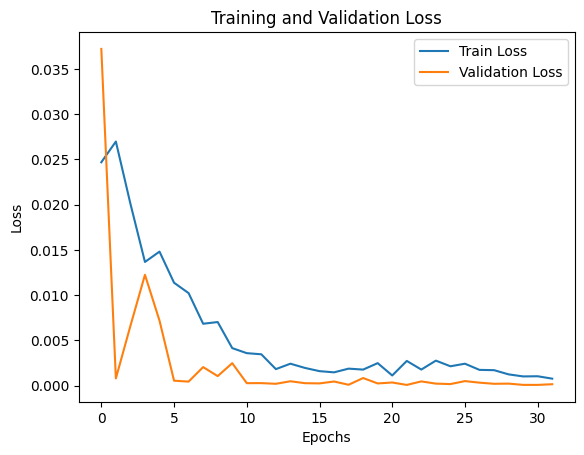

1/1 [==============================] - 1s 571ms/step
R-squared: 0.8103641598129441


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score
import optuna

# Load your dataset (assuming it's in a DataFrame named 'df')
# Replace 'Effort' with the actual column name you want to predict
target_column = 'Effort'

# Separate features (X) and target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Data Preprocessing
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_normalized = scaler_X.fit_transform(X.values)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X for LSTM input (assuming you have a sequence length)
sequence_length = 1  # Adjust based on your dataset
X_reshaped = X_normalized.reshape((X_normalized.shape[0], sequence_length, X_normalized.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_normalized, test_size=0.2, random_state=42)

# Model Construction and Training
def build_model(units1, units2, learning_rate):
    inp = Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2]))
    e = Sequential()(inp)
    g = LSTM(units=units1, return_sequences=True)(e)
    h = LSTM(units=units2, return_sequences=True)(g)
    s = Attention(use_scale=True)([h, h])
    f = Activation('relu')(s)
    out = Dense(1)(f)  # Assuming a regression task

    model = Model(inputs=inp, outputs=out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')  # You can use other loss functions for regression
    
    return model

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Objective function for Optuna
def objective(trial):
    units1 = trial.suggest_int('units1', 32, 128)
    units2 = trial.suggest_int('units2', 16, 64)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)

    model = build_model(units1=units1, units2=units2, learning_rate=learning_rate)
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=0)
    
    return mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1)))

# Perform hyperparameter tuning with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params

# Train the final model with the best hyperparameters
best_model = build_model(**best_params)
best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(best_model.history.history['loss'], label='Train Loss')
plt.plot(best_model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Prediction
y_pred = best_model.predict(X_test)

# Rescale predictions to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Rescale true labels to the original scale
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate R-squared
r_squared = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R-squared: {r_squared}")
